# Resources

<hr>

* spark MLlib
    * [Spark MLlib Official Documentation](https://spark.apache.org/mllib/)
    * [Spark-MLlib Main Guide](https://spark.apache.org/docs/latest/ml-guide.html)
    * [Spark MLlib RDD-based Guide](https://spark.apache.org/docs/latest/mllib-guide.html)
    * [Spark ML Pipelines](https://spark.apache.org/docs/latest/ml-pipeline.html)
    


* pyspark API references
    * [pyspark ~ getting started](https://spark.apache.org/docs/latest/api/python/getting_started/index.html)
    * [pyspark (core)](https://spark.apache.org/docs/latest/api/python/reference/pyspark.html)
    * [pyspark.sql](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql.html)
    * [pyspark.ml (DataFrame-based)](https://spark.apache.org/docs/latest/api/python/reference/pyspark.ml.html)
    * [pyspark.mllib (RDD-based)](https://spark.apache.org/docs/latest/api/python/reference/pyspark.mllib.html)
    


* Apache spark
    * [Apache Spark Official Documentation](https://spark.apache.org/docs/latest/index.html)
    * [RDD Programming Guide](https://spark.apache.org/docs/latest/rdd-programming-guide.html)
    * [SQL Programming Guide](https://spark.apache.org/docs/latest/sql-programming-guide.html)
    * [Official Example Code](https://spark.apache.org/examples.html)

<hr>


# RDD v/s DataFrame APIs


* [Refer announcement](https://spark.apache.org/docs/latest/ml-guide.html#announcement-dataframe-based-api-is-primary-api) : DataFrame-based API is primary API
* [GitHub](https://github.com/apache/spark/tree/master/python/pyspark)

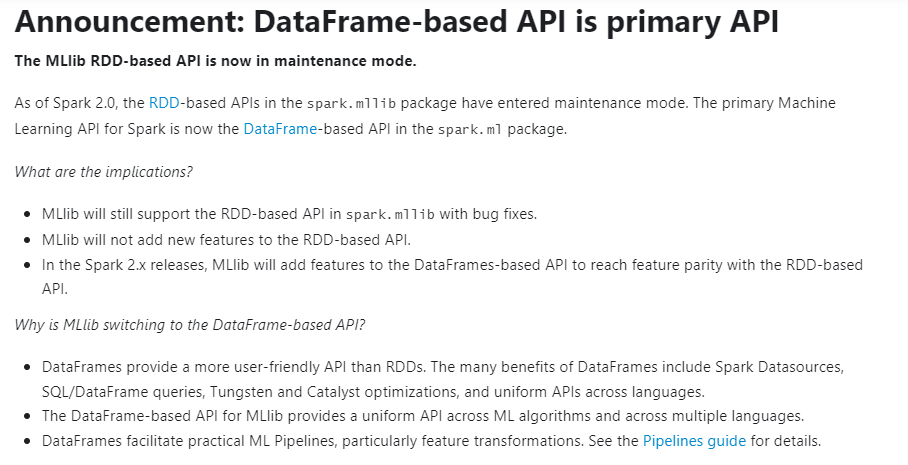

# ML Pipeplines

* [Spark ML Pipelines](https://spark.apache.org/docs/latest/ml-pipeline.html) provide a uniform set of high-level APIs built on top of DataFrames that help users create and tune practical machine learning pipelines. { API reference [pyspark.ml.Pipeline](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.Pipeline.html) }

* Main Componenets of ML Pipeline
    * **DataFrame**: This ML API uses DataFrame from Spark SQL as an ML dataset, which can hold a variety of data types. E.g., a DataFrame could have different columns storing text, feature vectors, true labels, and predictions.

    * **Transformer**: A Transformer is an algorithm which can transform one DataFrame into another DataFrame. E.g., an ML model is a Transformer which transforms a DataFrame with features into a DataFrame with predictions.

    * **Estimator**: An Estimator is an algorithm which can be fit on a DataFrame to produce a Transformer. E.g., a learning algorithm is an Estimator which trains on a DataFrame and produces a model.

    * **Pipeline**: A Pipeline chains multiple Transformers and Estimators together to specify an ML workflow.

    * **Parameter**: All Transformers and Estimators now share a common API for specifying parameters.

# Global Section

In [1]:
import pyspark, random, os, shutil, datetime, time, threading
import matplotlib.pyplot as plt
import numpy as np
import rlgw
from rlgw.model import WORLD, ENV
import data.tql as tql

# *[*] Session Start *[*]

In [3]:
# prepare a session
from pyspark.sql import SparkSession
start_time = datetime.datetime.now() # record the start time
spark = SparkSession.builder.appName('CS555').getOrCreate()  # to stop session use spark.stop()
sc = spark.sparkContext
sc.setLogLevel('OFF') # Valid log levels include: ALL, DEBUG, ERROR, FATAL, INFO, OFF, TRACE, WAR
spark

# [DStreams](https://spark.apache.org/docs/latest/streaming-programming-guide.html#transformations-on-dstreams)

In [13]:
def process_data(x):
    # xs is a string ~ timestep, label, peakloc, signal_len, signal
    xs = x.split(',')
    ts = int(xs[0])
    label = xs[1]
    peak = int(xs[2])
    slen = int(xs[3])
    sig = np.array(xs[4:-1]).astype(np.float32)
    plt.figure(figsize=(10,3))
    plt.title(xs[0:4])
    plt.plot(sig)
    plt.show()
    print(ts,label,peak,slen,sig)
    return [ts,label,peak,slen, sig]

In [14]:
from pyspark.streaming import StreamingContext
# Create a local StreamingContext with two working thread and batch interval of 1 second
ssc = StreamingContext(sc, 1)
a1 = ssc.socketTextStream("localhost", 9999)
#a2 = ssc.socketTextStream("localhost", 9998)
a1.map(process_data).saveAsTextFiles('out1')
#a2.map(process_data).saveAsTextFiles('out2')
#a1.map(process_data).pprint()
#a2.map(process_data).pprint()

ssc.start()

Figure(1000x300)            (0 + 1) / 1][Stage 35:>                 (0 + 1) / 1]
16 N 127 257 [ 8.51224899e-01  8.26665819e-01  6.51885450e-01  4.19294089e-01
  1.79233953e-01 -4.57566930e-04 -8.73443931e-02 -8.73927474e-02
 -6.93249777e-02 -5.91367334e-02 -6.75307587e-02 -7.38711581e-02
 -5.79687208e-02 -2.87366528e-02 -4.16186564e-02 -3.81953493e-02
 -1.52472360e-02  8.88888165e-03  1.65415276e-03 -1.36227068e-02
  2.33321986e-03  2.52647288e-02  2.43265517e-02  1.96826402e-02
  1.08201662e-02  4.07086313e-02  5.12166098e-02  5.33033684e-02
  5.61874770e-02  7.66990706e-02  8.96032229e-02  8.57619345e-02
  9.10679772e-02  1.02035306e-01  1.10097662e-01  1.16002329e-01
  9.46646258e-02  1.01470925e-01  1.08643562e-01  9.97335389e-02
  7.27531910e-02  4.22912054e-02  4.05854993e-02  3.24056558e-02
  6.12609042e-03 -5.10184839e-03 -5.99455321e-03  3.15942732e-03
 -6.85380492e-03 -2.03404296e-02 -1.79431438e-02 -1.42613500e-02
 -1.12633584e-02 -3.26584727e-02 -4.66391742e-02 -2.89299581e

In [ ]:
#call stop()

## STOP

In [15]:
ssc.stop(stopSparkContext=False)
print('Done!')

Exception in thread "receiver-supervisor-future-22" java.lang.InterruptedException: sleep interrupted
	at java.base/java.lang.Thread.sleep(Native Method)
	at org.apache.spark.streaming.receiver.ReceiverSupervisor.$anonfun$restartReceiver$1(ReceiverSupervisor.scala:196)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at scala.concurrent.Future$.$anonfun$apply$1(Future.scala:659)
	at scala.util.Success.$anonfun$map$1(Try.scala:255)
	at scala.util.Success.map(Try.scala:213)
	at scala.concurrent.Future.$anonfun$map$1(Future.scala:292)
	at scala.concurrent.impl.Promise.liftedTree1$1(Promise.scala:33)
	at scala.concurrent.impl.Promise.$anonfun$transform$1(Promise.scala:33)
	at scala.concurrent.impl.CallbackRunnable.run(Promise.scala:64)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1128)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:628)
	at java.base/java.lang.Thread.run(Thread.j

Done!


Figure(1000x300)===>        (2 + 2) / 4][Stage 39:>                 (0 + 0) / 1]
18 N 128 256 [ 8.52585673e-01  6.58364475e-01  4.06642705e-01  1.98658928e-01
  8.54242519e-02 -1.39704775e-02 -5.06138466e-02 -2.17083711e-02
 -1.27152354e-02 -2.43180990e-02 -2.62641720e-02 -2.62847003e-02
 -1.32052889e-02 -5.96656371e-03 -2.07331944e-02 -1.28565161e-02
  8.43255688e-03  1.13825118e-02 -2.53670849e-03 -6.23819511e-03
  1.61992349e-02  2.15798896e-02  9.01779626e-03 -5.10691386e-03
  8.90780333e-03  2.92458460e-02  2.06063669e-02  1.32470513e-02
  2.30599064e-02  4.15742211e-02  5.34763969e-02  3.68775353e-02
  4.31346484e-02  7.10371658e-02  6.56153560e-02  4.06898037e-02
  2.55493913e-02  3.58829461e-02  1.94559582e-02 -7.37539784e-04
  7.71779742e-04 -4.85202530e-03  3.93072516e-03  1.02827779e-03
 -2.83515709e-03 -1.02052046e-03  1.76127604e-03  2.85039656e-03
 -6.73313159e-03 -4.31164168e-03  7.81478919e-03  3.48658301e-03
 -1.23487655e-02 -2.50394456e-02  1.05314776e-02  2.32954398e

In [ ]:
ssc.start()

In [ ]:
#th = threading.Thread(target=ssc.start)
#th.start()
#ssc.awaitTermination()  # Wait for the computation to terminate

# Pipeline

In [4]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import HashingTF, Tokenizer

# Prepare training documents from a list of (id, text, label) tuples.
training = spark.createDataFrame([
    (0, "a b c d e spark", 1.0),
    (1, "b d", 0.0),
    (2, "spark f g h", 1.0),
    (3, "hadoop mapreduce", 0.0)
], ["id", "text", "label"])

# Configure an ML pipeline, which consists of three stages: tokenizer, hashingTF, and lr.
tokenizer = Tokenizer(inputCol="text", outputCol="words")
hashingTF = HashingTF(inputCol=tokenizer.getOutputCol(), outputCol="features")
lr = LogisticRegression(maxIter=10, regParam=0.001)

pipeline = Pipeline(stages=[tokenizer, hashingTF, lr])

# Fit the pipeline to training documents.
model = pipeline.fit(training)

# Prepare test documents, which are unlabeled (id, text) tuples.
test = spark.createDataFrame([
    (4, "spark i j k"),
    (5, "l m n"),
    (6, "spark hadoop spark"),
    (7, "apache hadoop")
], ["id", "text"])

# Make predictions on test documents and print columns of interest.
prediction = model.transform(test)
selected = prediction.select("id", "text", "probability", "prediction")
for row in selected.collect():
    rid, text, prob, prediction = row  # type: ignore
    print(
        "(%d, %s) --> prob=%s, prediction=%f" % (
            rid, text, str(prob), prediction   # type: ignore
        )
    )

(4, spark i j k) --> prob=[0.1596407738787412,0.8403592261212588], prediction=1.000000
(5, l m n) --> prob=[0.8378325685476614,0.16216743145233858], prediction=0.000000
(6, spark hadoop spark) --> prob=[0.06926633132976266,0.9307336686702373], prediction=1.000000
(7, apache hadoop) --> prob=[0.9821575333444208,0.017842466655579203], prediction=0.000000


# ml.regression

In [5]:
from pyspark.ml.regression import LinearRegression

# Load training data
training = spark.read.format("libsvm")\
    .load("./data/sample_linear_regression_data.txt")

lr = LinearRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8)

# Fit the model
lrModel = lr.fit(training)

# Print the coefficients and intercept for linear regression
print("Coefficients: %s" % str(lrModel.coefficients))
print("Intercept: %s" % str(lrModel.intercept))

# Summarize the model over the training set and print out some metrics
trainingSummary = lrModel.summary
print("numIterations: %d" % trainingSummary.totalIterations)
print("objectiveHistory: %s" % str(trainingSummary.objectiveHistory))
trainingSummary.residuals.show()
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

Coefficients: [0.0,0.32292516677405936,-0.3438548034562218,1.9156017023458414,0.05288058680386263,0.765962720459771,0.0,-0.15105392669186682,-0.21587930360904642,0.22025369188813426]
Intercept: 0.1598936844239736
numIterations: 6
objectiveHistory: [0.49999999999999994, 0.4967620357443381, 0.4936361664340463, 0.4936351537897608, 0.4936351214177871, 0.49363512062528014, 0.4936351206216114]
+--------------------+
|           residuals|
+--------------------+
|  -9.889232683103197|
|  0.5533794340053554|
|  -5.204019455758823|
| -20.566686715507508|
|    -9.4497405180564|
|  -6.909112502719486|
|  -10.00431602969873|
|   2.062397807050484|
|  3.1117508432954772|
| -15.893608229419382|
|  -5.036284254673026|
|   6.483215876994333|
|  12.429497299109002|
|  -20.32003219007654|
| -2.0049838218725005|
| -17.867901734183793|
|   7.646455887420495|
| -2.2653482182417406|
|-0.10308920436195645|
|  -1.380034070385301|
+--------------------+
only showing top 20 rows

RMSE: 10.189077
r2: 0.022861


# Data Sources

In [6]:
df = spark.read.option('header',
                            'true' #<---- the csv has a header
                           ).csv("./data/diabetes.txt", 
                                inferSchema=True) # add infer schema to load in proper data type

print(type(df), df.count())
df.printSchema()
df.show()

<class 'pyspark.sql.dataframe.DataFrame'> 768
root
 |-- Pregnancies: integer (nullable = true)
 |-- Glucose: integer (nullable = true)
 |-- BloodPressure: integer (nullable = true)
 |-- SkinThickness: integer (nullable = true)
 |-- Insulin: integer (nullable = true)
 |-- BMI: double (nullable = true)
 |-- DiabetesPedigreeFunction: double (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Outcome: integer (nullable = true)

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|
|          8|    183|           64|            0|      0|23.3|   

In [ ]:
from pyspark.ml.regression import LinearRegression
df = spark.read.option('header',
                            'true' #<---- the csv has a header
                           ).csv("./data/diabetes.txt", 
                                inferSchema=True) # add infer schema to load in proper data type

print(type(df), df.count())
df.printSchema()
df.show()

# Feature Hasher

In [9]:
from pyspark.ml.feature import FeatureHasher
hasher = FeatureHasher(inputCols=["Glucose", "BloodPressure", "Insulin"],
                       outputCol="features")
featurized = hasher.transform(df)
featurized.show(truncate=False)


+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+-----------------------------------------------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin|BMI |DiabetesPedigreeFunction|Age|Outcome|features                                       |
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+-----------------------------------------------+
|6          |148    |72           |35           |0      |33.6|0.627                   |50 |1      |(262144,[6894,10806,145004],[148.0,0.0,72.0])  |
|1          |85     |66           |29           |0      |26.6|0.351                   |31 |0      |(262144,[6894,10806,145004],[85.0,0.0,66.0])   |
|8          |183    |64           |0            |0      |23.3|0.672                   |32 |1      |(262144,[6894,10806,145004],[183.0,0.0,64.0])  |
|1          |89     |66           |23           |94     |28.1|0.167                   |21 |0      |(262144,[6894

# Example :[A]: MNIST Classification

* THE [MNIST DATABASE](http://yann.lecun.com/exdb/mnist/) of handwritten digits
    * Yann LeCun, Courant Institute, NYU
    * Corinna Cortes, Google Labs, New York
    * Christopher J.C. Burges, Microsoft Research, Redmond


In [ ]:
from data.mnist_batcher import save_single
save_single( DATA_DIR='./data/mnist', DEST_DIR='./data/mnist_csv')

## Data-Source

# [*]* Session Stop [*]*

In [10]:
data_srcdir = './data/mnist_csv'
data_train_file = os.path.join(data_srcdir, 'train.csv')
data_test_file = os.path.join(data_srcdir, 'test.csv')

from pyspark.ml.linalg import Matrix, Matrices
from pyspark.ml.linalg import Vectors
def Reshape(xs):
    """ parses each row of data and converts to appropiate data type"""
    x = xs.split(",")
    return [ int(x[0]),  Vectors.dense(x[1:]) ]

# prepare RDDs to take data from
RDD_Train = sc.textFile(data_train_file).map(Reshape)
RDD_Test = sc.textFile(data_test_file).map(Reshape)

## Create Frames

In [11]:
Train_frame = RDD_Train.toDF(['label','features'])
Train_frame.printSchema()
Test_frame = RDD_Test.toDF(['label','features'])
Test_frame.printSchema()
Train_frame.show(5)

root
 |-- label: long (nullable = true)
 |-- features: vector (nullable = true)

root
 |-- label: long (nullable = true)
 |-- features: vector (nullable = true)

+-----+--------------------+
|label|            features|
+-----+--------------------+
|    5|[0.0,0.0,0.0,0.0,...|
|    0|[0.0,0.0,0.0,0.0,...|
|    4|[0.0,0.0,0.0,0.0,...|
|    1|[0.0,0.0,0.0,0.0,...|
|    9|[0.0,0.0,0.0,0.0,...|
+-----+--------------------+
only showing top 5 rows



## Use a MultiLayer Perceptron 

In [12]:
from pyspark.ml.classification import MultilayerPerceptronClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
#splits=dframe.randomSplit([0.6, 0.4]) #train = splits[0] #test = splits[1]
trainer = MultilayerPerceptronClassifier(maxIter=20, layers=[28*28,512,512,128,10])
model = trainer.fit(Train_frame)
print('Done Training!')
result = model.transform(Test_frame)
predictionAndLabels = result.select("prediction", "label")
evaluator = MulticlassClassificationEvaluator(metricName="accuracy")
print("Test set accuracy = " + str(evaluator.evaluate(predictionAndLabels)))

KeyboardInterrupt: 

# ~Done

In [ ]:
spark.stop()

stop_time = datetime.datetime.now()
elapsed_time = stop_time-start_time
print('Session Duration:', elapsed_time)